#### I normally put the relevant libraries here at the top.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### User inputs follow. Note that the storm intensity is per time interval. For example, the first index of storm intensity would be at time 1 * time interval, the second index would be at 2 * time interval, and so forth. It is important to be consistent with units here; for example 2, the final graph displays flow in cfs against time in hr. This is not a problem as long as this is made clear. If you would like to try example 1, hash out example 2 and unhash example 1. 

In [27]:
# Example 2
regions = ('A', 'B', 'C', 'D', 'E')
areas = np.array([10, 12, 16, 12, 10]) 
losses = np.array([0.4, 0.6, 0.7, 0.6, 0.4]) 
time_interval = 0.5 
storm_intensity = np.array([1.2, 1.8, 1.4]) 

# Example 1
# regions = ('A', 'B', 'C', 'D')
# areas = np.array([100, 200, 300, 100]) 
# losses = np.array([0, 0, 0, 0]) 
# time_interval = 1
# storm_intensity = np.array([.5, .5, .5, .5, .5])

#### The rows is used to populate the table (DataFrame in Pandas) appropriately. The times column effectively starts the table. Flows generates a list of lists, whereby each region has its own.

In [28]:
rows = len(regions) + len(storm_intensity)
times = np.arange(0, (rows + 1) * time_interval, time_interval)
flows = [area * (storm_intensity - loss) for area, loss in zip(areas, losses)]

#### Establishing the dataframe itself and populating it. Note that we start with columns of zeroes and effectively overwrite them with their respective flow lists. Lastly we add a sum column that sums all previous columns aside from Time.

In [32]:
data = {'Time (hr)': times}

for i, region in enumerate(regions):
    data[region] = [0] * len(times)
    data[region][i+1 :i+len(storm_intensity)+1] = flows[i]

df = pd.DataFrame(data)

df['Total Flow'] = df.drop(columns=['Time (hr)']).sum(axis=1)

#### Showing the dataframe. Note that using print to display it does not seem to work as well.

In [33]:
df

,Time (hr),A,B,C,D,E,Total Flow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,8.0,0.0,0.0,0.0,0.0,8.0
2,1.0,14.0,7.2,0.0,0.0,0.0,21.2
3,1.5,10.0,14.4,8.0,0.0,0.0,32.4
4,2.0,0.0,9.6,17.6,7.2,0.0,34.4
5,2.5,0.0,0.0,11.2,14.4,8.0,33.6
6,3.0,0.0,0.0,0.0,9.6,14.0,23.6
7,3.5,0.0,0.0,0.0,0.0,10.0,10.0
8,4.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Graphing. Seaborn works very well with Pandas, and typically when dealing with Pandas I will prefer it over Matplotlib solely. 

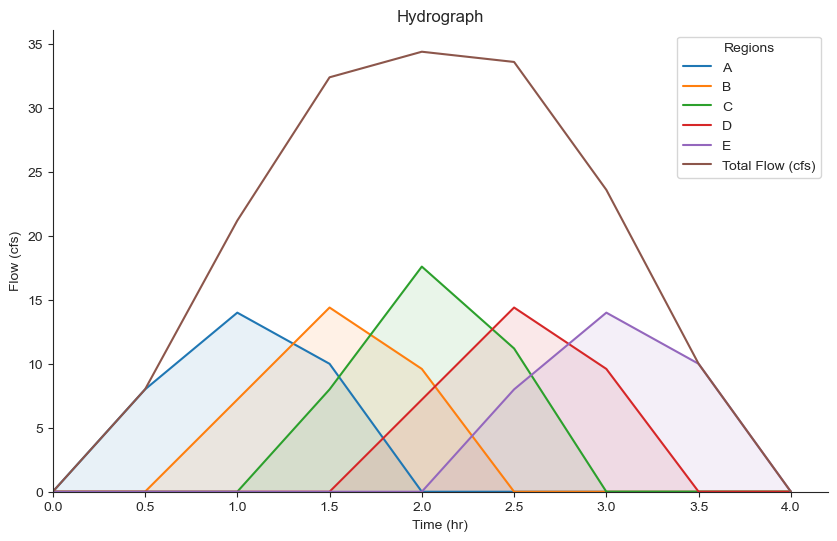

In [31]:
sns.set_style("ticks")

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.lineplot(x='Time (hr)', y='value', hue='variable', data=pd.melt(df, 'Time (hr)'))

plt.xlabel('Time (hr)')
plt.ylabel('Flow (cfs)')
plt.title('Hydrograph')
plt.ylim(0)
plt.xlim(0)

plt.legend(title='Regions')

for area in regions:
    plt.fill_between(df['Time (hr)'], 0, df[area], alpha=0.1)

sns.despine()

plt.show()